🔄 모델과 데이터를 로드합니다...
✅ 로드 완료!

📊 Classification Report:
              precision    recall  f1-score   support

 Bearish (0)       1.00      1.00      1.00        10
 Bullish (1)       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



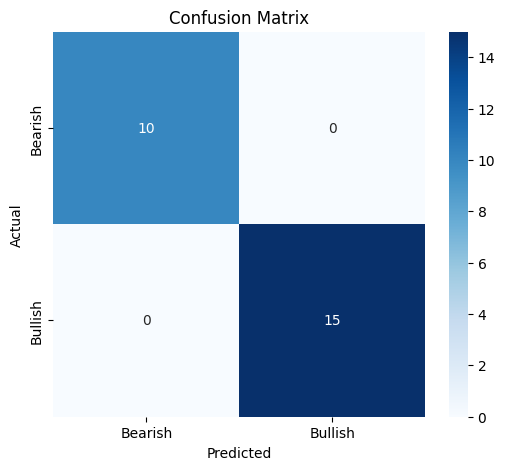

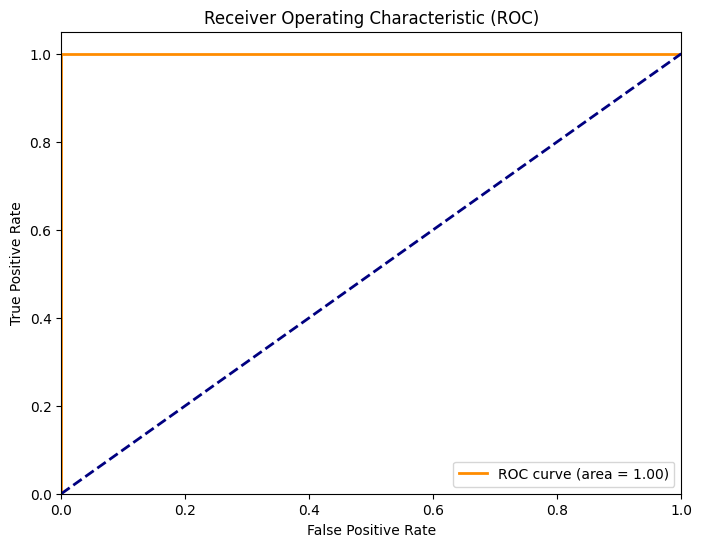

In [2]:
# ==========================================
# [Cell 1] 라이브러리 및 모델 로드
# ==========================================
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

print("🔄 모델과 데이터를 로드합니다...")

# 저장된 파일 불러오기
try:
    model = joblib.load('models/sentiment_model.joblib')
    vectorizer = joblib.load('models/tfidf_vectorizer.joblib')
    test_df = pd.read_csv('models/test_set.csv')
    print("✅ 로드 완료!")
except FileNotFoundError:
    print("❌ 모델 파일이 없습니다. 'training.ipynb'를 먼저 실행하세요.")

# ==========================================
# [Cell 2] 예측 수행 (Inference on Test Set)
# ==========================================
X_test = test_df['text']
y_true = test_df['label']

# 전처리 (Train 때와 동일하게)
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

X_test_clean = X_test.apply(clean_text)
X_test_vec = vectorizer.transform(X_test_clean)

# 예측
y_pred = model.predict(X_test_vec)
y_prob = model.predict_proba(X_test_vec)[:, 1] # ROC Curve용 확률

# ==========================================
# [Cell 3] 정량적 평가 (Metrics)
# ==========================================
# 1. Classification Report (Precision, Recall, F1-Score)
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Bearish (0)', 'Bullish (1)']))

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bearish', 'Bullish'], yticklabels=['Bearish', 'Bullish'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ==========================================
# [Cell 4] ROC Curve (Optional but Recommended)
# ==========================================
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()